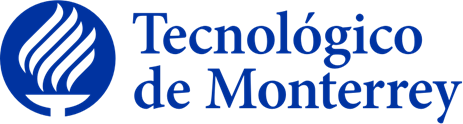

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Visión computacional para imágenes y video - TC4033.10**
### Prof: Dr. Gilberto Ochoa Ruiz

## **Actividad: 2.6 Google Colab - Algoritmos de mejoramiento de imágenes basado por pixeles**
### Enero 21 de 2024

Los ejercicios que deben agregarse a este proyecto serán las siguientes:

1. Investiga e implementa el método tile-based histogram equalization. En estos métodos, la imagen se particiona en diferentes ventanas (i.e. mosaicos) y los histogramas se calculan de forma independiente, aplicando la corrección sobre cada ventana. Existe un compromiso entre el tamaño de la ventana y la complejidad computacional, por lo cual es más complejo que el método simple. 2. Implementa esta versión y realiza algunas pruebas variando el tamaño de la ventana. Otro inconveniente es que se puede observar posibles diferencias entre los el contraste de los bloques, ¿cómo podría mejorarse?
2. Investiga e implementa un método sencillo del Sliding Window Adaptive Histogram Equalization (SWAHE) y compara algunas imágenes con diferentes tipos de imágenes.
3. Investiga cómo funciona el algoritmo CLAHE (contrast limited adaptive histogram equalization) y realiza una implementación (puede ser usando la implementación de OpenCV). Prueba sobre diferentes tipos de imágenes y compara con el método de ecualización de histogramas básico. Provee una breve descripción del método a partir de una  investigación bibliográfica.

## **Nombres y matrículas de los integrantes del Equipo 24:**

* Victor Alejandro Regueira Romero | A01794404
* Fernando Maytorena Espinosa de los Monteros | A01110946
* Edgar Rodolfo Escobar Gómez | A01793900
* Jonathan Garza Bennet | A01793038
* Rafael José Mateo Comprés | A01793054

Nota: Nuestro código de la actividad se encuentra al final, después del código de ejemplo suministrado por el profesor.

# 2. Image Enhancement

## Table of Contents
1. [Libraries](#libraries)
2. [Histogram Equalization](#hist)
3. [Denoising with Filters](#denoising)
4. [Challenge](#challenge)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import exposure
from skimage import io
import skimage
from scipy.ndimage import gaussian_filter as gauss
from scipy.ndimage import median_filter as med
import cv2

/usr/local/lib/python3.10/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


## Nuestras Funciones Auxiliares <a class="anchor" id="funciones" ></a>

In [2]:
import urllib.request

In [3]:

import urllib.request

#From: https://stackoverflow.com/questions/72456644/what-is-the-meaning-of-flag-in-cv2-imdecode:
#1 specifies cv2.IMREAD_COLOR : Reads image in BGR color format and removes the alpha channel .It is the default value of flag.
#0 specifies cv2.IMREAD_GRAYSCALE : Reads image in grayscale.
#-1 specifies cv2.IMREAD_UNCHANGED : Reads image without change, preserves the alpha channel
IMREAD_COLOR = 1
IMREAD_GRAYSCALE = 0
IMREAD_UNCHANGED = -1
def load_imgURL_CV2(imgURL, flags=-1):
  req = urllib.request.urlopen(imgURL)
  arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
  return cv2.imdecode(arr, flags)

def load_imgURL_PIL(imgURL):
  urllib.request.urlretrieve(imgURL, 'tempImg')
  return Image.open('tempImg')

Código para montar el drive de la máquina temporal donde corre Google Colab.

También creamos el directorio `data` ya que es usado para algunas pruebas.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import os

datadir = './data'

if not os.path.exists(datadir):
  os.mkdir(datadir)
  print("%s ha sido creado!" % datadir)
else:
  print("Directorio %s ya existe" % datadir)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directorio ./data ya existe


Imágenes a usar

In [5]:
IMAGEN = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/image.jpg'
IMAGENPNG = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/chessboard.jpg'
IMAGENJPG = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/board.jpg'
IMAGEN_GRIS = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/blox.jpg'

CHESSBOARD_JPG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/chessboard.jpg'
CONVOLUTION_PNG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/convolution.png'
ELON_1_JPG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/elon_1.jpg'
ELON_2_PNG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/elon_2.png'
IMAGE_JPG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/image.jpg'
IMAGE_01_01_PNG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/image_01_01.png'
IMAGE_01_02_PNG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/image_01_02.png'
IMAGE_02_01_PNG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/image_02_01.png'
IMAGE_02_02_PNG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/image_02_02.png'
IMG_NPY = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/img.npy'
LINEAR_GRADIENT_PNG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/linear_gradient.png'


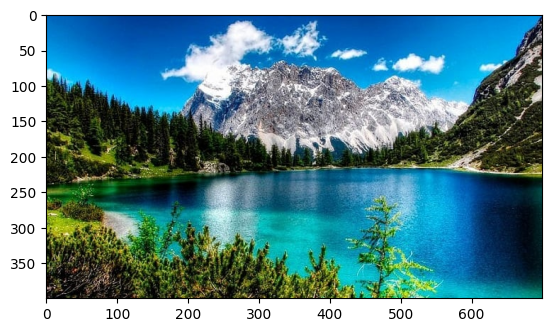

In [6]:
#original_image = Image.open('data/image.jpg')
original_image = load_imgURL_PIL(IMAGEN)
plt.imshow(original_image)
type(original_image)

# Save the image
np.save('data/img.npy', original_image)
original_image.save('data/image.jpg', 'JPEG')


#Load the image
original_image = np.load('data/img.npy')


## Histogram Equalization<a class="anchor" id="hist" ></a>

Let's look at the distribution of pixel values in the image.

Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.

An easy way to check this is to plot a histogram.

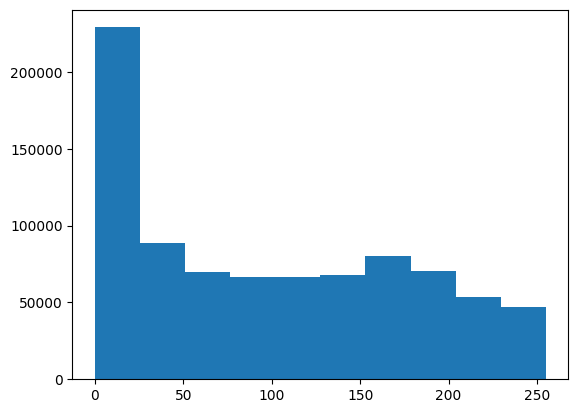

In [7]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(original_image.ravel())
plt.show()

Another useful way to visualize the statistics of an image is as a cumulative distribution function (CDF) plot. Which shows the cumulative pixel intensity frequencies from 0 to 255.

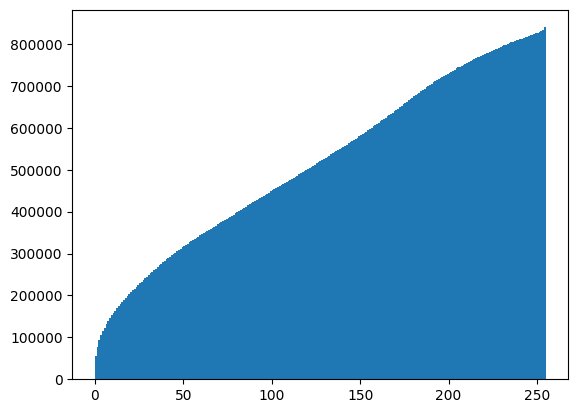

In [8]:
plt.hist(original_image.ravel(), bins=255, cumulative=True)
plt.show()

The histogram and CDF for our image show pretty uneven distribution - there's a lot of contrast in the image. Ideally we should equalize the values in the images we want to analyse to try to make our images more consistent in terms of the shapes they contain irrespective of light levels.

Histogram equalization is often used to improve the statistics of images. In simple terms, the histogram equalization algorithm attempts to adjust the pixel values in the image to create a more uniform distribution. The code in the cell below uses the  **exposure.equalize_hist** method from the **skimage** package to equalize the image.  

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


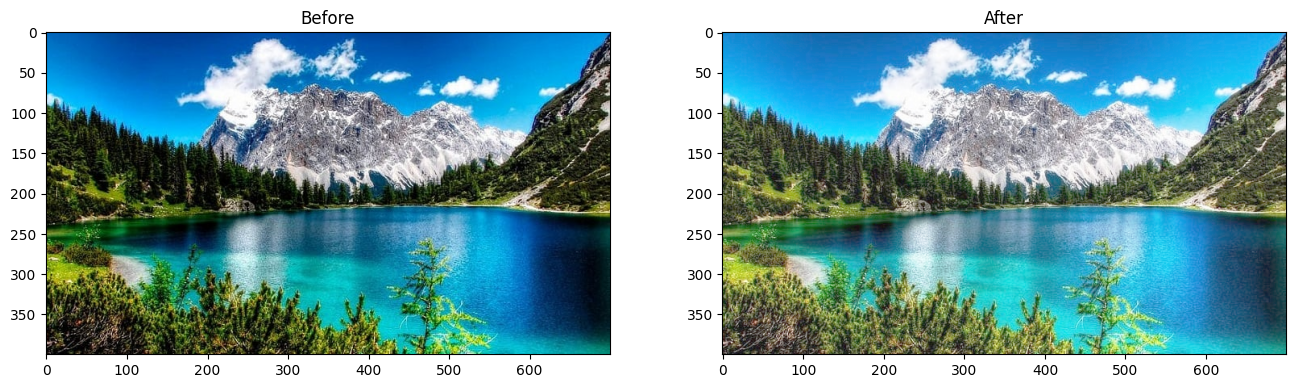

In [9]:
original_image_eq = exposure.equalize_hist(original_image)

fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('After')

plt.show()

As with most image operations, there's more than one way to do this. For example, you could also use the **PIL.ImgOps.equalize** method:

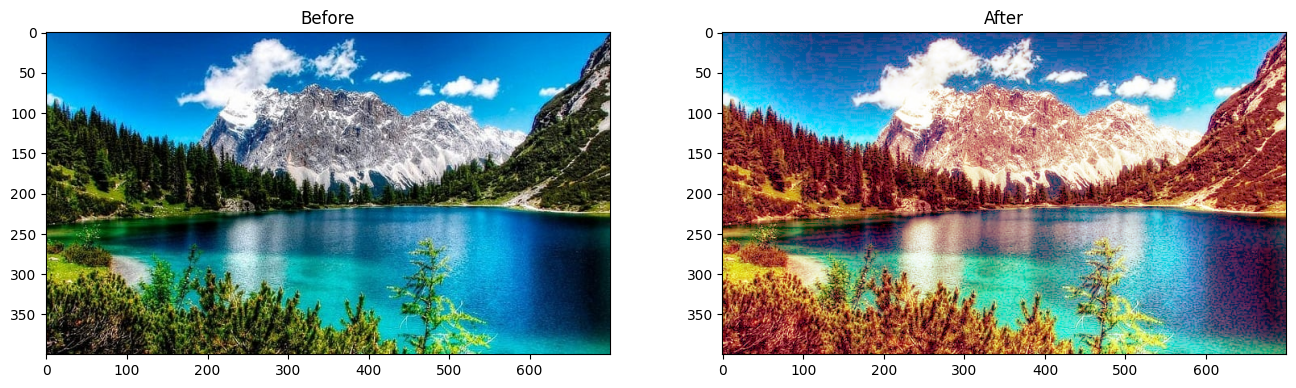

In [10]:

# Equalize the image - but we need to convert the numpy array back to the PIL image format
image_PIL_eq = ImageOps.equalize(Image.fromarray(original_image))

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(image_PIL_eq)
a.set_title('After')

plt.show()

Now let's see what that's done to the histogram and CDF plots:

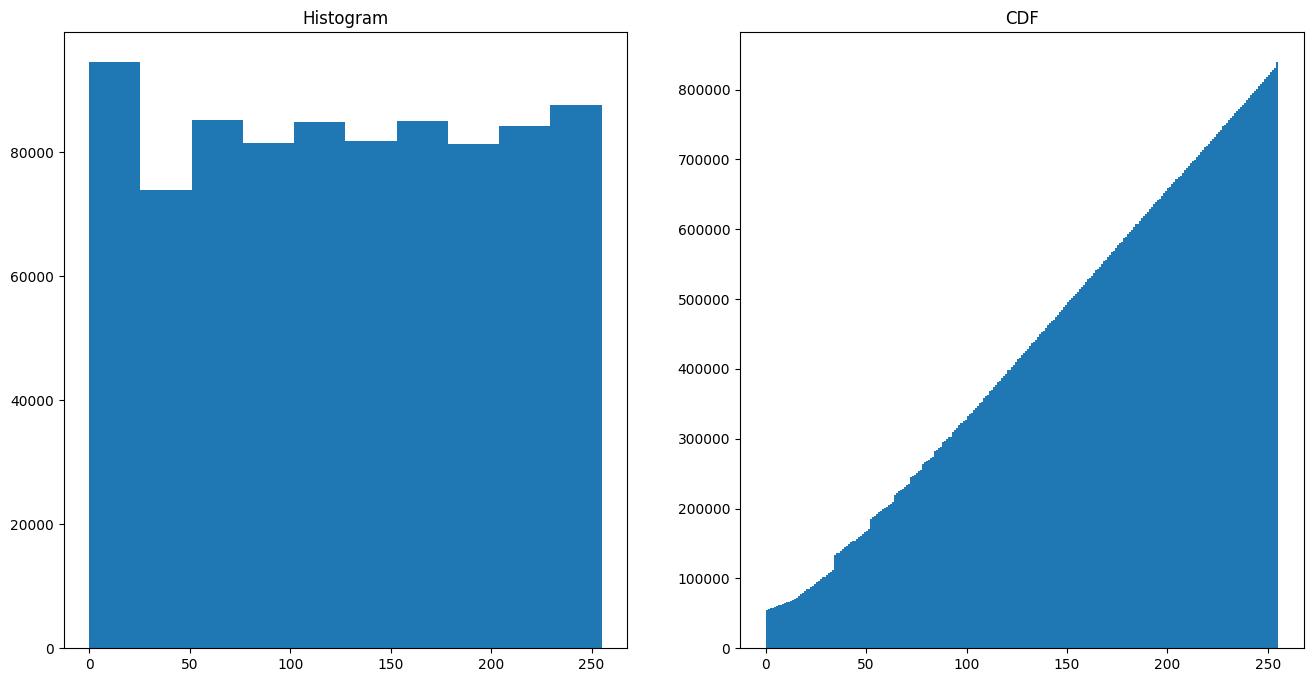

In [11]:
# Display histograms
img_eq = np.array(image_PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(img_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

The pixel intensities are more evenly distributed in the equalized image. In particular, the cumulative density shows a straight diagonal cumulation; which is a good sign that the pixel intensity values have been equalized.

## Denoising with Filters <a class="anchor" id="denoising" ></a>

Often images need to be cleaned up to remove "salt and pepper" noise.

### Add Some Random Noise
Let's add some random noise to our image - such as you might see in a photograph taken in low light or at a low resolution.

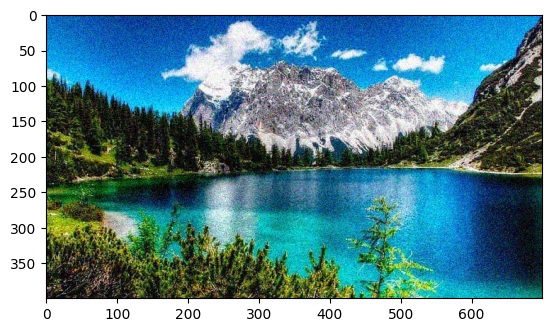

In [12]:
img_n = skimage.util.random_noise(original_image)
plt.imshow(img_n)

### Using a Gaussian Filter
A Gaussian filter applies a weighted average (mean) value for pixels based on the pixels that surround them.

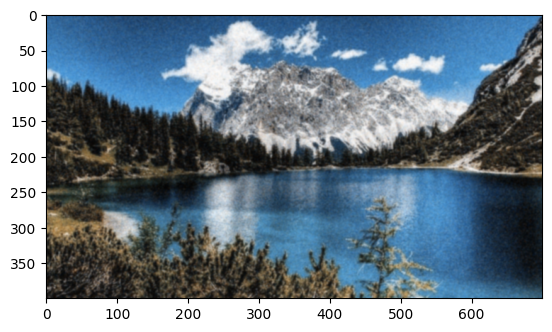

In [13]:
img3_gauss = gauss(img_n, sigma=1)
plt.imshow(img3_gauss)

### Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

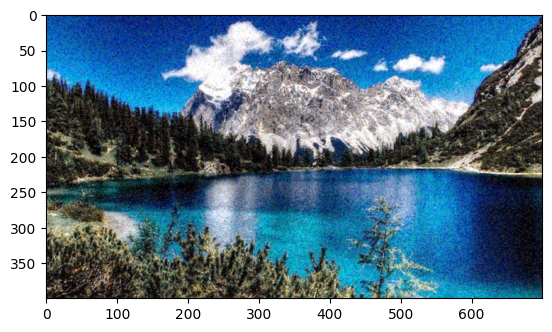

In [14]:
img_med = med(img_n, size=2)
plt.imshow(img_med)

## Challenge <a class="anchor" id="challenge" ></a>

Now, try solving this challenge, you must equalize different windows of the same image in a splitted way.

In [15]:
!pip install image_slicer
from image_slicer import slice

In [16]:
n = 4
slice('data/image.jpg', n)

(<Tile #1 - image_01_01.png>,
 <Tile #2 - image_01_02.png>,
 <Tile #3 - image_02_01.png>,
 <Tile #4 - image_02_02.png>)

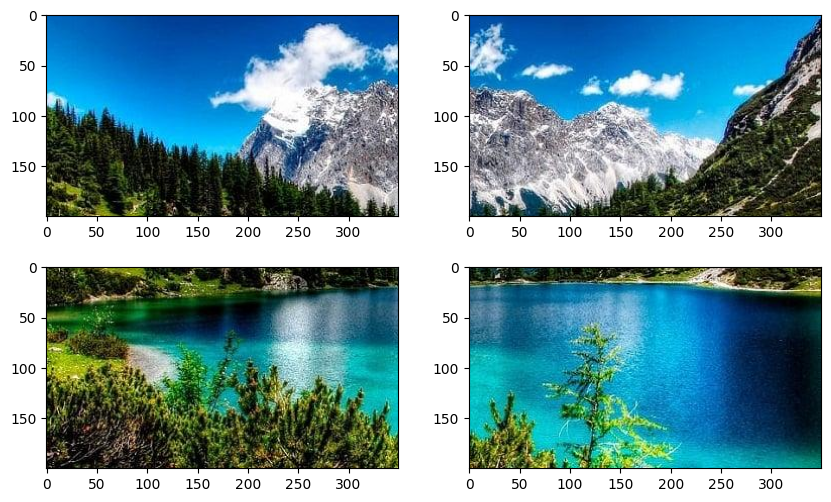

In [17]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
img = Image.open(f'data/image_01_01.png')
plt.imshow(img)

plt.subplot(2,2,2)
img = Image.open(f'data/image_01_02.png')
plt.imshow(img)

plt.subplot(2,2,3)
img = Image.open(f'data/image_02_01.png')
plt.imshow(img)

plt.subplot(2,2,4)
img = Image.open(f'data/image_02_02.png')
plt.imshow(img)

plt.show()

#Actividad

## 1. Tile-based histogram equalization.

**1. Investiga e implementa el método tile-based histogram equalization. En estos métodos, la imagen se particiona en diferentes ventanas (i.e. mosaicos) y los histogramas se calculan de forma independiente, aplicando la corrección sobre cada ventana. Existe un compromiso entre el tamaño de la ventana y la complejidad computacional, por lo cual es más complejo que el método simple. Implementa esta versión y realiza algunas pruebas variando el tamaño de la ventana. Otro inconveniente es que se puede observar posibles diferencias entre los el contraste de los bloques, ¿cómo podría mejorarse?**


La técnica de mosaicos se basa en aplicar la ecualización por histogramas tradicional a segmentos predefinidos de la imagen original.


Entre menos número de ventanas usadas, más se aproxima al método global, que en realidad vendría a ser un caso especial donde se usa sólo una ventana.

Usando la imagen de ejemplo del libro de texto, podemos observar que la ecualización global no revela los elementos de bajo contraste en los cuadrados negros. Esot porque la imagen tiene pixeles o áreas muy cercanas al blanco y muy cercanas al negro, por lo que no hay mucho que incrementar el contraste.

Tamaño (shape) imagen original:  (512, 512)


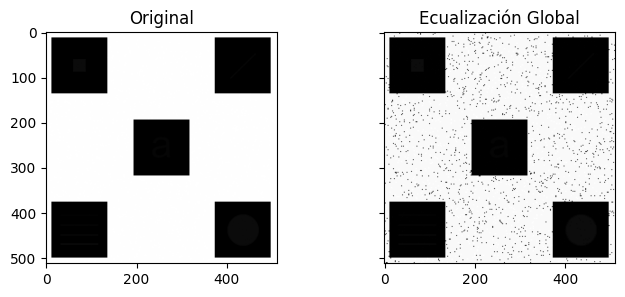

In [18]:
IMAGEN_TILES = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data26/LowContrast.tif'

original = load_imgURL_CV2(IMAGEN_TILES, flags=IMREAD_GRAYSCALE)
#Estandarizamos el tamaño a 512 para poder usar la rutina con cualquier imagen
#original = cv2.resize(original, (512,512))

histograma_tradicional = cv2.equalizeHist(original)

dpi = plt.rcParams['figure.dpi']
height, width = original.shape

# Asignamos el tamaño de acuerdo a la image para hacer que el número de
# pixels concuerde con la pantalla
#figsize = width*3.1 / float(dpi), height / float(dpi)
figsize = 8,3
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize, dpi=dpi, sharex=True, sharey=True)

#Verificamos tamaño
print("Tamaño (shape) imagen original: ", original.shape)
a = plt.subplot(1,2,1)
a.set_title("Original")
plt.imshow(original, cmap='gray')
a = plt.subplot(1,2,2)
a.set_title("Ecualización Global")
plt.imshow(histograma_tradicional, cmap='gray')
plt.show()

Número de ventas en dirección vertical (y):  10
Número de ventas en dirección horizontal (x):  15


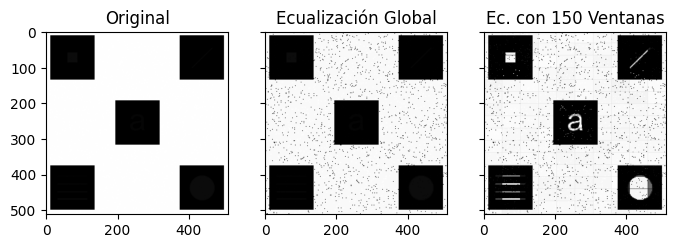

----------------------------------------------------------------------------------------

Número de ventas en dirección vertical (y):  10
Número de ventas en dirección horizontal (x):  4


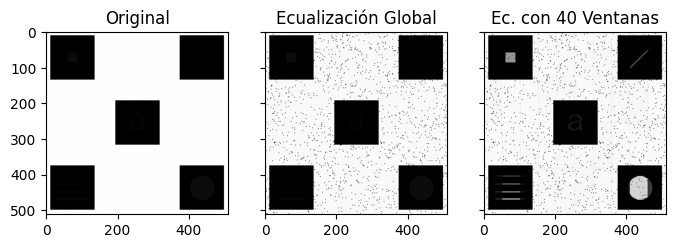

----------------------------------------------------------------------------------------

Número de ventas en dirección vertical (y):  10
Número de ventas en dirección horizontal (x):  1


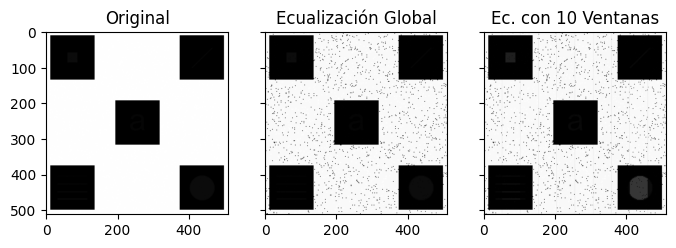

----------------------------------------------------------------------------------------

Número de ventas en dirección vertical (y):  4
Número de ventas en dirección horizontal (x):  15


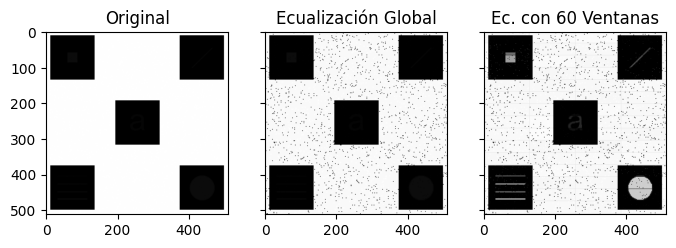

----------------------------------------------------------------------------------------

Número de ventas en dirección vertical (y):  4
Número de ventas en dirección horizontal (x):  4


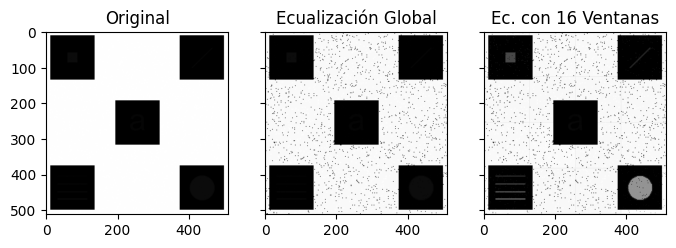

----------------------------------------------------------------------------------------

Número de ventas en dirección vertical (y):  4
Número de ventas en dirección horizontal (x):  1


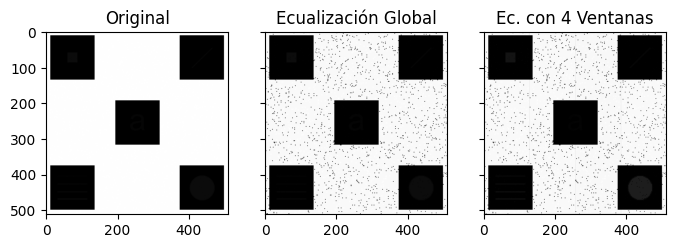

----------------------------------------------------------------------------------------

Número de ventas en dirección vertical (y):  1
Número de ventas en dirección horizontal (x):  15


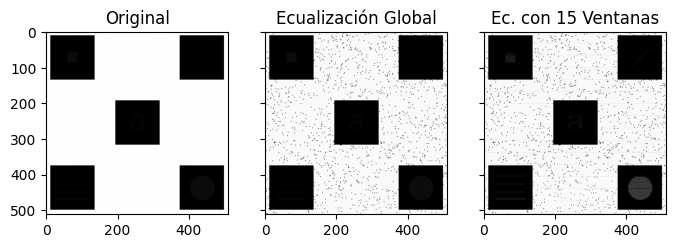

----------------------------------------------------------------------------------------

Número de ventas en dirección vertical (y):  1
Número de ventas en dirección horizontal (x):  4


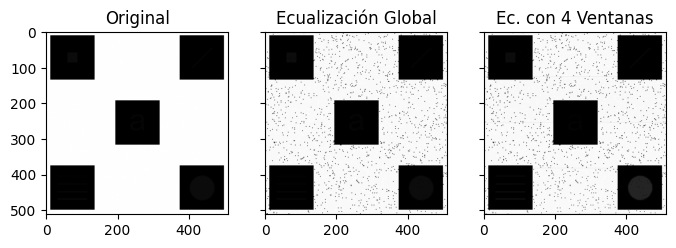

----------------------------------------------------------------------------------------

Número de ventas en dirección vertical (y):  1
Número de ventas en dirección horizontal (x):  1


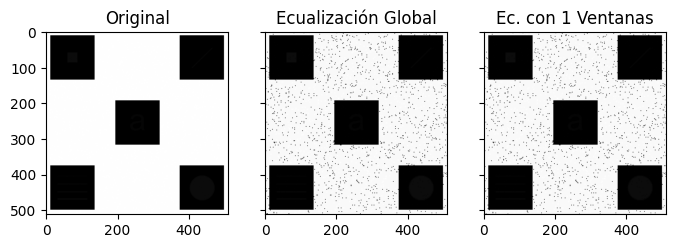

----------------------------------------------------------------------------------------



In [19]:

#Número de ventanas a usar verticalmente
lista_n_vertical = [1, 4, 10]
#Número de ventanas a usar horizontalmente
lista_n_horizontal = [1, 4, 15]

#Iteramos sobre las opciones de número de ventanas horizontal y vertical
for n_vertical in reversed(lista_n_vertical):
  for n_horizontal in reversed(lista_n_horizontal):

    #Creamos una copia del original donde aplicaremos los resultados obtenidos
    img_procesada = original.copy()

    y_size = int(height/n_vertical)
    x_size = int(width/n_horizontal)

    print("Número de ventas en dirección vertical (y): ", n_vertical)
    print("Número de ventas en dirección horizontal (x): ", n_horizontal)

    #Iteramos sobre todas las ventanas
    for i in range(n_horizontal):
      for j in range(n_vertical):
        #Las ventanas de los bordes derecho e inferior pueden ser
        #más pequeñas si el tamaño no dá para un número entero de ventanas
        if i == (n_horizontal-1):
          extremo_derecho = width-1
        else:
          extremo_derecho = (i+1)*(x_size)-1
        #Lo mismo aplica para y en sentido vertical
        if j == (n_vertical-1):
          extremo_inferior = height-1
        else:
          extremo_inferior = (j+1)*(y_size)-1

        ventana = img_procesada[i*x_size:extremo_derecho, j*y_size:extremo_inferior]
        ventana_ecualizada = cv2.equalizeHist(ventana)
        #Inserta la ventana ecualizada en la imagen original de acuerdo a su posición
        img_procesada[i*x_size:extremo_derecho, j*y_size:extremo_inferior] = ventana_ecualizada

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=figsize, dpi=dpi, sharex=True, sharey=True)
    a = plt.subplot(1,3,1)
    a.set_title("Original")
    plt.imshow(original, cmap='gray')
    a = plt.subplot(1,3,2)
    a.set_title("Ecualización Global")
    plt.imshow(histograma_tradicional, cmap='gray')
    a = plt.subplot(1,3,3)
    a.set_title(f"Ec. con {n_vertical*n_horizontal} Ventanas")
    plt.imshow(img_procesada, cmap='gray')

    plt.show()
    print("-"*88)
    print()

**Otro inconveniente es que se puede observar posibles diferencias entre los el contraste de los bloques, ¿cómo podría mejorarse?**


Uno de los métodos para mitigar el efecto de "blocking" es usando "smooth blending" cuando se vuelvan a unir cada uno de los bloques individuales.

## 2. Sliding Window Adaptive Histogram Equalization (SWAHE)

**2. Investiga e implementa un método sencillo del Sliding Window Adaptive Histogram Equalization (SWAHE) y compara algunas imágenes con diferentes tipos de imágenes.**


Este método de transformación es en realidad un método de pixel a pixel. Consiste en que, en vez de dividir la imagen en ventanas y ecualizarlas independientemente, se procesa cada pixel en el centro de la ventana asignándole el valor que le correspondería luego de la ecualización, para luego desplazar la ventana solamente un pixel cada vez. Dado que el pixel que se procesa es el central, el tamaño de la ventana-kernel, tiene que ser impar para que el pixel siendo procesado se encuentre siempre en el centro del kernel.

Este método, como se puede observar en los ejemplos, genera "artifacts" provenientes de un efecto de amplificación del ruido en áreas del mismo color. La existencia de sólo un pixel gris en un área negra pro ejemplo, causa que este pixel gris se convierta en blanco, amplificando su efecto indeseado.

Tamaño (shape) imagen original:  (512, 512)


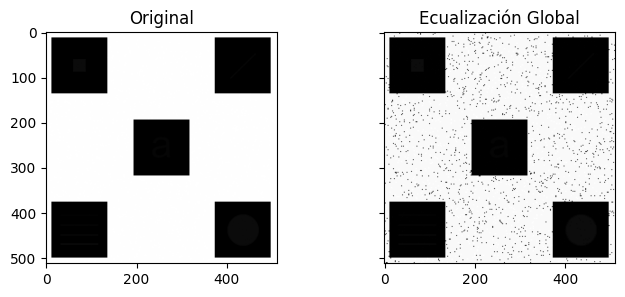

In [25]:
#Apuntamos a la imagen que usaremos
IMAGEN_TILES = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data26/LowContrast.tif'
#IMAGEN_TILES = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/blox.jpg'

#Cargamos la imagen en formato CV2
original = load_imgURL_CV2(IMAGEN_TILES, flags=IMREAD_GRAYSCALE)
height, width = original.shape


#Obtenemos el histograma tradicional para comparar
histograma_tradicional = cv2.equalizeHist(original)

#Inicializamos el plot
dpi = plt.rcParams['figure.dpi']
figsize = 8,3
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize, dpi=dpi, sharex=True, sharey=True)

#Verificamos tamaño
print("Tamaño (shape) imagen original: ", original.shape)
a = plt.subplot(1,2,1)

#Desplegamos la imagen original y la ecualización global
a.set_title("Original")
plt.imshow(original, cmap='gray')
a = plt.subplot(1,2,2)
a.set_title("Ecualización Global")
plt.imshow(histograma_tradicional, cmap='gray')
plt.show()

En la celda anterior podemos observar como la ecualización global lo único que logra es amplificar el ruido.

Procedemos a implementar la ventana deslizable con varios tamaños de kernel. Nótese como al disminuir el tamaño del kernel aumenta la amplificación del ruido y los llamados "artifacts".

Tamaño del kernel =  (41, 41)


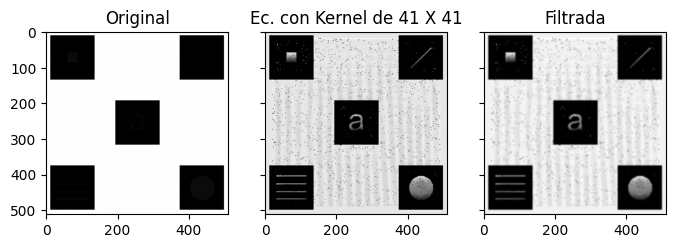

----------------------------------------------------------------------------------------

Tamaño del kernel =  (31, 31)


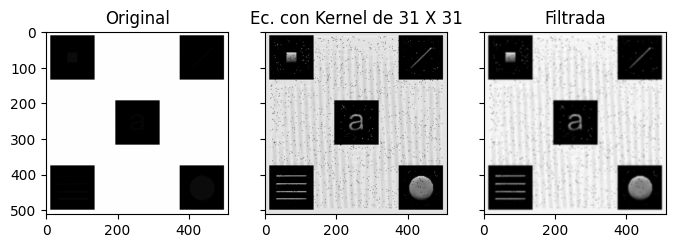

----------------------------------------------------------------------------------------

Tamaño del kernel =  (21, 21)


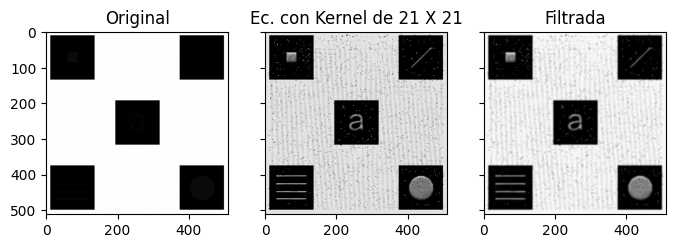

----------------------------------------------------------------------------------------

Tamaño del kernel =  (15, 15)


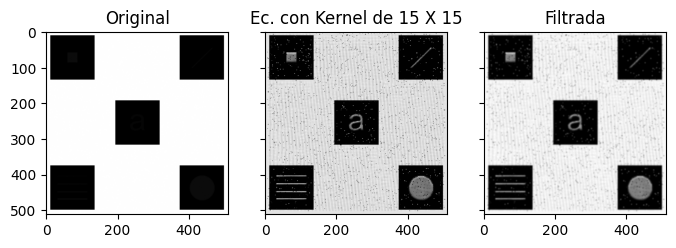

----------------------------------------------------------------------------------------

Tamaño del kernel =  (9, 9)


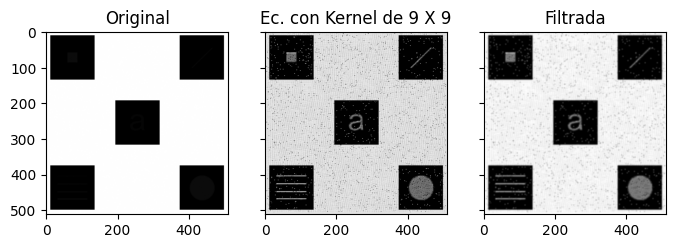

----------------------------------------------------------------------------------------



In [26]:

#Creamos una lista con los tamaños de ventana (tile) que usaremos
tamaños = [(9,9), (15,15), (21,21), (31,31), (41,41)]

for tamaño in reversed(tamaños):
  print("Tamaño del kernel = ", tamaño)

  #Creamos una copia del original donde aplicaremos los resultados obtenidos para
  #cada pixel
  img_procesada = original.copy()

  alto = tamaño[0]
  ancho = tamaño[1]
  #Obtenemos el borde mínimo a mantener para evitar errores al direccionar los
  #arreglos
  bordeX = int((ancho-1)/2)
  bordeY = int((alto-1)/2)

  #Recorremos los pixeles a ecualizar, todos excepto los de borde.
  for x in range(bordeX, width - bordeX - 1):
    for y in range(bordeY, height - bordeY - 1):
      #Extraemos el pixel que se está procesando y sus vecinos de acuardo con el
      #tamaño del kernel
      tile = img_procesada[x-bordeX:x+bordeX, y-bordeY:y+bordeY]
      #tile = original[x-bordeX:x+bordeX, y-bordeY:y+bordeY]
      #Ecualizamos el tile
      equ = cv2.equalizeHist(tile)
      #Sólo el pixel central es reemplazado
      img_procesada[x,y] = equ[bordeX,bordeY]

  #Filtramos la image usando un filtro gaussiano
  img_filtrada = cv2.GaussianBlur(img_procesada, (7,7), 0)
  #img_filtrada = cv2.blur(img_procesada, (7,7))

  # Desplegamos las imágenes original, ecualizada y la filtrada
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=figsize, dpi=dpi, sharex=True, sharey=True)
  a = plt.subplot(1,3,1)
  a.set_title("Original")
  plt.imshow(original, cmap='gray')
  a = plt.subplot(1,3,2)
  a.set_title(f"Ec. con Kernel de {alto} X {ancho}")
  plt.imshow(img_procesada, cmap='gray')
  a = plt.subplot(1,3,3)
  a.set_title("Filtrada")
  plt.imshow(img_filtrada, cmap='gray')

  plt.show()
  print("-"*88)
  print()


In [27]:
def equalizer(im):
  lab_img= cv2.cvtColor(im, cv2.COLOR_BGR2LAB)
  l, a, b = cv2.split(lab_img)
  equ = cv2.equalizeHist(l)
  updated_lab_img1 = cv2.merge((equ,a,b))
  hist_eq_img = cv2.cvtColor(updated_lab_img1, cv2.COLOR_LAB2BGR)
  return hist_eq_img


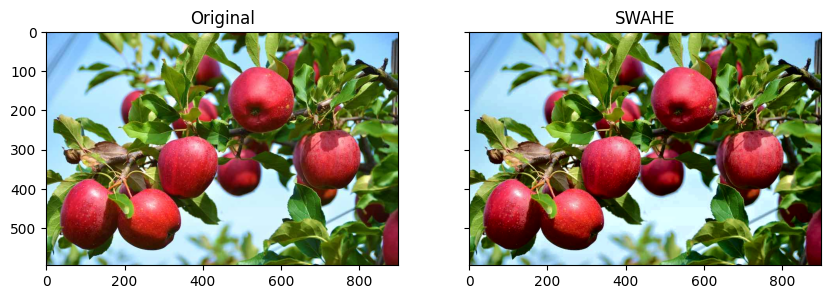

In [29]:
IMAGEN_APPLE = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/apple.jpg'

org_im = load_imgURL_PIL(IMAGEN_APPLE)

SWAHE = load_imgURL_CV2(IMAGEN_APPLE)
SWAHE = equalizer(SWAHE)
SWAHE = cv2.cvtColor(SWAHE, cv2.COLOR_BGR2RGB)

# Imprimimos ambas imágenes
figsize = 10,10
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize, dpi=dpi, sharex=True, sharey=True)
# Desplegamos la imagen original
a = plt.subplot(1,2,1)
a.set_title("Original")
plt.imshow(org_im)
#  Imagen con ecualización
a = plt.subplot(1,2,2)
a.set_title("SWAHE")
plt.imshow(SWAHE)
plt.show()

## 3. Algoritmo CLAHE

**3. Investiga cómo funciona el algoritmo CLAHE (contrast limited adaptive histogram equalization) y realiza una implementación (puede ser usando la implementación de OpenCV). Prueba sobre diferentes tipos de imágenes y compara con el método de ecualización de histogramas básico. Provee una breve descripción del método a partir de una  investigación bibliográfica.**

CLAHE, "Contrast Limited Adaptive Histogram Equalization" (Ecualización de Histograma Adaptativo con Límite de Contraste), es una técnica utilizada para mejorar el contraste local en una imagen. Funciona aplicando la ecualización de histograma de manera adaptativa, lo que significa que se realiza no en toda la imagen, sino en regiones locales.

La ecualización del histograma solo considera el contraste global de la imagen. En muchos casos, esto no es una buena idea. La ecualización del histograma ayuda a mejorar el contraste, pero se puede perder información debido al exceso de brillo. Esto se debe a que su histograma no se limita a una región en particular.

Para resolver este problema, se utiliza la ecualización de histograma adaptativa. La imagen se divide en pequeños bloques llamados "mosaicos". Luego, cada uno de estos bloques se ecualiza como de la misma forma que en en el método de ecualización de histograma. Al limitarse a una región pequeña, si hay ruido, éste se amplificará. Para evitar esto, se aplica limitación de contraste. Si algún contenedor de histograma está por encima del límite de contraste especificado, esos píxeles se recortan y distribuyen uniformemente a otros contenedores antes de aplicar la ecualización del histograma. Después de la ecualización, para eliminar artefactos en los bordes de los mosaicos, se aplica la interpolación bilineal.

CLAHE adapta la ecualización del histograma a regiones locales de una imagen, lo que permite mejorar el contraste en áreas específicas sin afectar globalmente la imagen. Esta técnica es especialmente útil en situaciones en las que el contraste varía significativamente en diferentes partes de una imagen, como imágenes médicas (campo donde fue aplicado por primera vez) o fotografías con iluminación irregular.

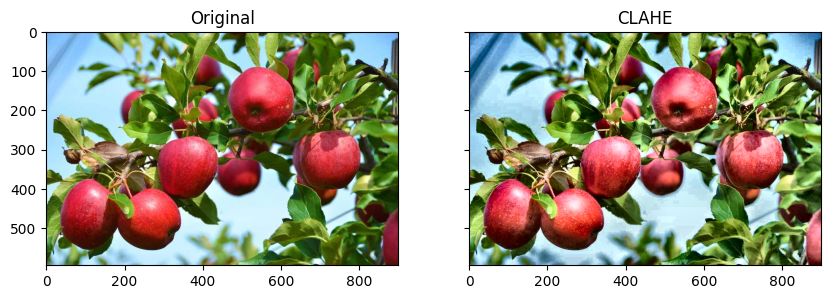

In [30]:
IMAGEN_APPLE = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/apple.jpg'

org_im = load_imgURL_PIL(IMAGEN_APPLE)

clahe_im = load_imgURL_CV2(IMAGEN_APPLE)

lab_img= cv2.cvtColor(clahe_im, cv2.COLOR_BGR2LAB)

# Splitting the LAB image to L, A and B channels, respectively
l, a, b = cv2.split(lab_img)

# CLAHE
# Apply CLAHE to L channel
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
clahe_img = clahe.apply(l)

updated_lab_img2 = cv2.merge((clahe_img,a,b))

# Convert LAB image back to color (RGB)
CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)

# Imprimimos ambas imágenes
figsize = 10,10
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize, dpi=dpi, sharex=True, sharey=True)
# Desplegamos la imagen original
a = plt.subplot(1,2,1)
a.set_title("Original")
plt.imshow(org_im)
#  Imagen con ecualización
a = plt.subplot(1,2,2)
a.set_title("CLAHE")
plt.imshow(cv2.cvtColor(CLAHE_img, cv2.COLOR_BGR2RGB))
plt.show()

## **BIBLIOGRAFIA**

Gonzalez, R., y Woods, R. (2018). *Digital Image Processing*. 4th Edition Pearson.

DigitalSreeni. (Abril 1, 2020). *113- Histogram equalization and CLAHE . Youtube*. https://www.youtube.com/watch?v=jWShMEhMZI4

Kuran, E. (Marzo 28, 2021). *A Guide to Contrast Enhancement: Transformation Functions, Histogram Sliding, Contrast Stretching and Histogram Equalization Methods with Implementations from Scratch using OpenCV Python*. Medium Website. https://emrecankuran.medium.com/a-guide-to-contrast-enhancement-transformation-functions-histogram-sliding-contrast-stretching-34149e5cdeed

Proyecto OpenCV. (s. f.) *Histograms - 2: Histogram Equalization*. https://docs.opencv.org/4.x/d2/d74/tutorial_js_histogram_equalization.html (obtenido en Enero 20 de 2024)

Zuiderveld, K. (1994). *Contrast Limited Adaptive Histogram Equalization.* Computer Vision Research Group. Utretch University. https://www.tamps.cinvestav.mx/~wgomez/material/AID/CLAHE.pdf

Usuario stackoverflow.com Soumya. (Junio 17, 2022). *What is the meaning of 'flag' in cv2.imdecode?*. https://stackoverflow.com/questions/72456644/what-is-the-meaning-of-flag-in-cv2-imdecode

Ochoa, G. (Enero de 2024). *Tema 1.2 Ecualización por histogramas*. Presentación de Power Point, Maestría en Inteligencia Artificial Aplicada, ITESM.


